Perform sensitivity analysis for threshold distance and number of particles considered in the release. 

In [1]:
import numpy as np
from sklearn.utils import resample
import dispersion_utils as utils
import matplotlib.pyplot as plt
from matplotlib import colors 

For June 2017 year, compute the sensitivity analysis: DVM II-vs-2D

In [2]:
home_folder = "/nethome/manra003/analysis/dispersion/outputs/"

states_count = 100
no_particles = 104636
threshold_dist = 100
t_days = 100

sample_year= 2017
sample_month_index=5
dist_data = np.load(
    home_folder + "Distances/{0}-{1}/all_sep_array_{0}_{1}_{2}_tc{3}km.npy".format('DVM', '2D', sample_year, threshold_dist))

<h3> A. Threshold distance sensitivity

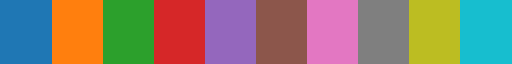

In [3]:
dpi=300
cmap = plt.get_cmap('tab10')
new_cmap = colors.ListedColormap(cmap(np.arange(10)))
new_cmap


In [4]:
thresholds = [10, 25, 50, 100, 200]

Discarded:  0
Discarded:  0
Discarded:  2
Discarded:  20
Discarded:  68


Text(0, 0.5, 'CDF (Td=100 km)')

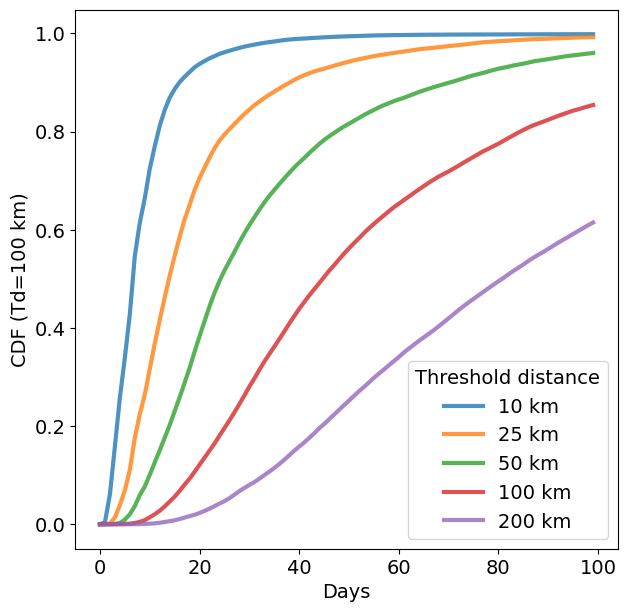

In [5]:

fig=plt.figure(figsize=(7,7), dpi=dpi)
text_size=14
ax=plt.axes()
for i, td in enumerate(thresholds):
    cdfs, _ = utils.get_diff_CDF_PDF(dist_data[:,:,sample_month_index], td, t_days)
    ax.plot(cdfs[:-1], color=new_cmap(i), alpha=0.8, label=str(td) +' km', linewidth=3)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
bbox_to_anchor=(0.5, -0.2)
plt.legend(by_label.values(), by_label.keys(), fontsize=text_size, title="Threshold distance", title_fontsize=text_size)
plt.tick_params("both", labelsize=text_size)
plt.xlabel("Days",fontsize=text_size)
plt.ylabel("CDF (Td=100 km)", fontsize=text_size)

plt.savefig(home_folder + "Figures/" +
            "Sensitivity_DVM-2D_td_{0}-2017.jpeg".format(str(sample_month_index+1).zfill(2)))


<h3> B. Number of particles in the release

In [6]:
sample_size = [5000, 10000, 50000, 100000, no_particles]

Create 100 unique subsets (resample) of particles of a select size (using the sample_size list) and compute the CDF with 100 km threshold distance. individual CDFs are plotted here

Discarded:  2
Discarded:  0
Discarded:  1
Discarded:  0
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  2
Discarded:  2
Discarded:  0
Discarded:  1
Discarded:  2
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  0
Discarded:  0
Discarded:  1
Discarded:  1
Discarded:  2
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  2
Discarded:  0
Discarded:  1
Discarded:  2
Discarded:  0
Discarded:  2
Discarded:  1
Discarded:  2
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  3
Discarded:  1
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  1
Discarded:  2
Discarded:  2
Discarded:  0
Discarded:  2
Discarded:  1
Discarded:  0
Discarded:  2
Discarded:  1
Discarded:  2
Discarded:  2
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  1
Discarded:  0
Discarded:  2
Discarded:  1
Discarded:  0
Discarded:  0
Discarded:  0
Discarded:  2
Discar

Text(0, 0.5, 'CDF (Td=100 km)')

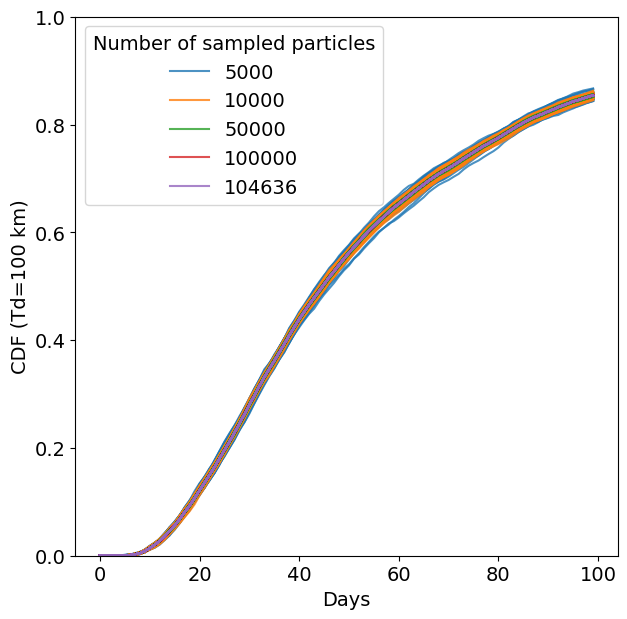

In [7]:
fig=plt.figure(figsize=(7,7), dpi=dpi)
ax=plt.axes()
for i, s in enumerate(sample_size):
    for state in range(1, states_count+1):
        sample_ind = resample(np.arange(0, no_particles),
                              replace=False, n_samples=s, random_state=state)
        sample_ind = np.sort(sample_ind)
        dist_subset = np.take(dist_data[:, :, sample_month_index], sample_ind, axis=0)
        cdfs, _ = utils.get_diff_CDF_PDF(dist_subset, threshold_dist, t_days)
        ax.plot(cdfs[:-1], color=new_cmap(i), alpha=0.8, label=s)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
bbox_to_anchor=(0.5, -0.2)
plt.legend(by_label.values(), by_label.keys(), fontsize=text_size, title="Number of sampled particles", title_fontsize=text_size)
plt.tick_params("both", labelsize=text_size)
plt.xlabel("Days",fontsize=text_size)
plt.ylim(0,1)
plt.ylabel("CDF (Td=100 km)", fontsize=text_size)
plt.savefig(home_folder + "Figures/" +
            "Sensitivity_DVM-2D_numberparticles_{0}-2017.jpeg".format(str(sample_month_index+1).zfill(2)))

        